# Predicting Bank Churn 

Business Understanding & Introduction here

## Data Preparation

In [40]:
import pandas as pd
import numpy as np

The dataset was found on Kaggle and consists of 

In [41]:
df = pd.read_csv("bank_churn2.csv")
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [42]:
df.shape

(10000, 12)

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
credit_score,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
products_number,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
credit_card,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
active_member,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimated_salary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
churn,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


## Data Understanding

The average age of customers is approximately 39 years old. The average salary is about $100k (we are unsure whatI wonder what currency this is considering that it is in three different countries or if it has been converted to USD **(Let's assume it's USD)**. On average, the churn rate is about 20 percent (considering that churn is a binary feature). There are not any missing values in the data set, so we did not have to complete any initial data cleaning. The max tenure of the customers of this dataset is 10 years, but on average the tenure is 5 years. This seems like a really short time considering the age range of the customers.

In [44]:
df['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

In [45]:
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

- As I suspected, there are no missing values in any of the columns

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [47]:
df["country"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

- The countries for this dataset are from **France, Germany, and Spain**. How does this impact our analysis?

In [48]:
df.gender.value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

- The gender distribution is almost split evenly

In [49]:
df.duplicated().sum()

0

- There are no duplications in the dataset either, so the dataset is pretty clean to move onto visualizations

<AxesSubplot:>

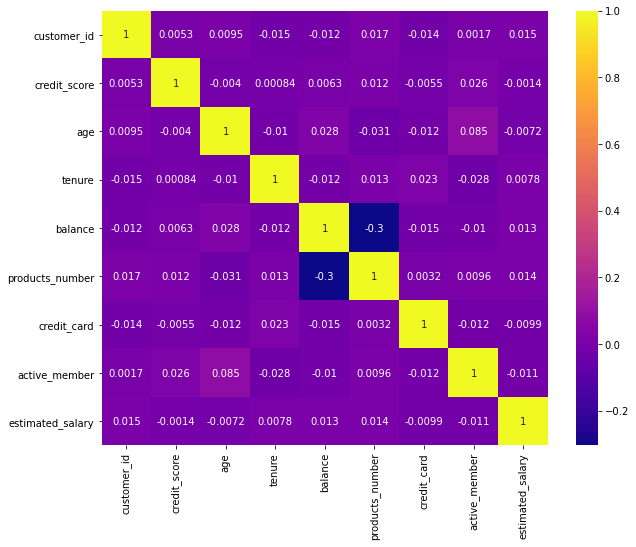

In [50]:
#Visualizing correlations between the features using a heatmap
df2 = df.drop("churn", axis=1)
corr = df2.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cbar=True, cmap='plasma')

- The top three most **positively correlated** values are:
    - **age vs. active_member:** 0.085
    - **age vs. balance:** 0.028
    - **credit_score vs. active_member:** 0.026


- The most **negatively correlated** values is:
    - **balance vs. products_number:** -0.3

[Text(0.5, 1.0, 'Distribution of Tenure')]

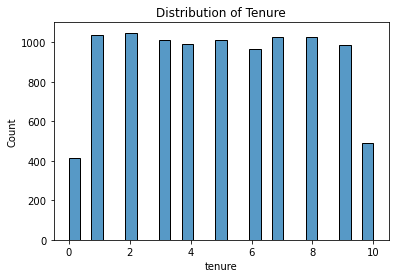

In [51]:
sns.histplot(df['tenure']).set(title='Distribution of Tenure')

[Text(0.5, 1.0, 'Country Frequency')]

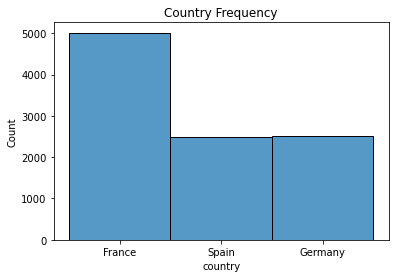

In [52]:
sns.histplot(df['country']).set(title='Country Frequency')

<AxesSubplot:xlabel='balance', ylabel='Count'>

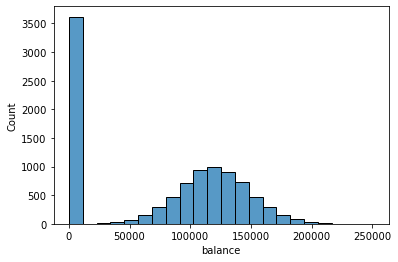

In [53]:
sns.histplot(df['balance'])

In [54]:
df['balance'].value_counts()

0.00         3617
105473.74       2
130170.82       2
113063.83       1
80242.37        1
             ... 
183555.24       1
137648.41       1
112689.95       1
115465.28       1
74681.90        1
Name: balance, Length: 6382, dtype: int64

- Most people have a balance of 0 maybe 20% of the people who churn come from this category

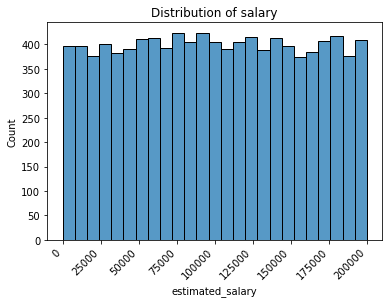

In [55]:
sns.histplot(df['estimated_salary'], bins=25).set(title='Distribution of salary')
plt.xticks(rotation=45, ha='right');

C:\Users\abwilliams\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Distribution of Customer Age')]

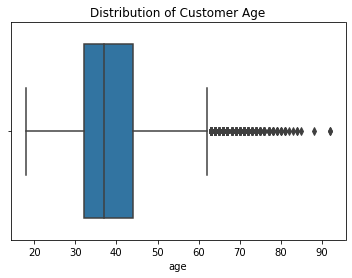

In [56]:
sns.boxplot(df['age']).set(title='Distribution of Customer Age')

### Multiple Logistic Regression

In [57]:
from sklearn.preprocessing import LabelEncoder

df['gender'] = LabelEncoder().fit_transform(df['gender'])
df['country'] = LabelEncoder().fit_transform(df['country'])

In [58]:
import statsmodels.api as sm

X = df[['credit_score','age','tenure','estimated_salary','balance','products_number','active_member','credit_card','gender','country']]
X = sm.add_constant(X)
y = df['churn']

In [59]:
model = sm.OLS(y, X).fit()
summary = model.summary()

print(summary)

                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     157.9
Date:                Wed, 06 Dec 2023   Prob (F-statistic):          4.68e-309
Time:                        16:29:55   Log-Likelihood:                -4361.3
No. Observations:               10000   AIC:                             8745.
Df Residuals:                    9989   BIC:                             8824.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1083      0.034  

###### According to the F-Statistic p-value it seems as though the value is much lower than the set alpha of 0.05, indicating that the model is statistically significant.

### Feature Importance

In [60]:
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [61]:
from sklearn.preprocessing import LabelEncoder

df['gender'] = LabelEncoder().fit_transform(df['gender'])
df['country'] = LabelEncoder().fit_transform(df['country'])

X = df.drop(['customer_id','churn'], axis=1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

C:\Users\abwilliams\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\abwilliams\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\abwilliams\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\abwilliams\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


Text(0.5, 1.0, 'Out-of-Bag Error')

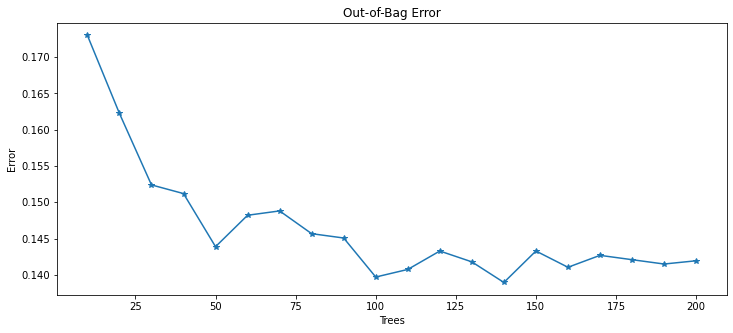

In [62]:
trees = np.linspace(10, 200, 20, dtype=np.int16)

OOB_Score = []
for num_trees in trees:
    rf = RandomForestClassifier(n_estimators=num_trees, warm_start=True, oob_score=True).fit(X_train, y_train)
    OOB_Score.append(1-rf.oob_score_)
    
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(trees, OOB_Score, '-*')
ax.set_xlabel('Trees')
ax.set_ylabel('Error')
ax.set_title('Out-of-Bag Error')

In [63]:
rf = RandomForestClassifier(n_estimators=200).fit(X_train, y_train)

In [64]:
rf_accuracy = accuracy_score(y_test, rf.predict(X_test))
print('Accuracy of Random Forest', rf_accuracy)

Accuracy of Random Forest 0.8593939393939394


<AxesSubplot:>

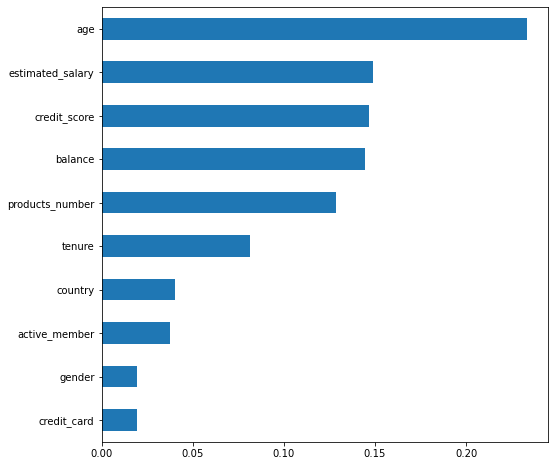

In [65]:
forest_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
fig, ax = plt.subplots(figsize=(8,8))
forest_importances.sort_values().plot.barh(ax=ax)
plot.title()

- Interestingly enough it doesn't seem as though being an active member is as an important feature as we thought

### Modeling + Accuracy Scoring

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
#Encoding categorical labels for modelling

from sklearn.preprocessing import LabelEncoder

df['gender'] = LabelEncoder().fit_transform(df['gender'])
df['country'] = LabelEncoder().fit_transform(df['country'])

X = df.drop(['customer_id','churn'], axis=1)
y = df['churn']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
#Standardize x_train and x_test values for modelling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [93]:
#Model Training for Logistic Regression, Decision Tree, and Random Forest

from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble  import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score

#Creating a dictionary of models with their names
models = {'Logistic Regression':LR(), 
          'Decision Tree':DT(),
          'Random Forest': RF()}

for name, model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy : {accuracy_score(y_test,y_pred)} ")

Logistic Regression Accuracy : 0.8155 
Decision Tree Accuracy : 0.792 
Random Forest Accuracy : 0.865 


- According to what we found, amongst the three models Random Forest Classifier has the highest accuracy. While it isn't as close to 1 it is a reasonable value of at least 85% accuracy for our model

In [71]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = model.predict_proba(X_test)


def prediction(credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary):
    features = np.array([[credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary]])
    features = sc.fit_transform(features)
    prediction = rf.predict(features).reshape(1,-1)
    return prediction[0]

In [72]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [73]:
credit_score = 699
country = 0
gender = 0
age= 39
tenure= 1
balance = 0.00
products_number= 2
credit_card = 0
active_member = 0
estimated_salary = 93826.63

pred  = prediction(credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary)

if pred == 1:
    print("No longer a bank customer")
else:
    print("Still a bank customer")

Still a bank customer


<AxesSubplot:ylabel='Feature'>

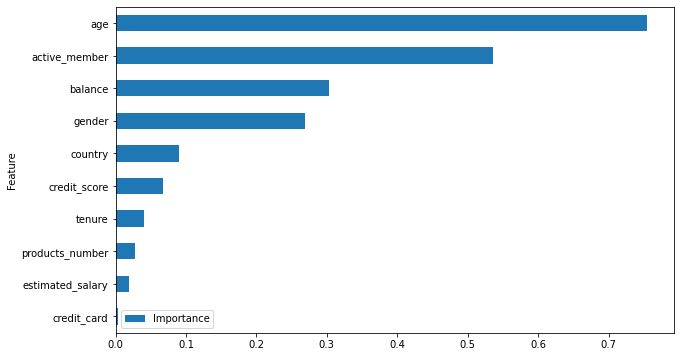

In [100]:
coefficients = lrmodel.coef_

avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [98]:
lrmodel = LR().fit(X_train,y_train)
predicted_probabilities = lrmodel.predict_proba(X_test)
print(predicted_probabilities)

[[0.8404469  0.1595531 ]
 [0.92254645 0.07745355]
 [0.65189882 0.34810118]
 ...
 [0.67225009 0.32774991]
 [0.92337272 0.07662728]
 [0.88773987 0.11226013]]


In [99]:
print("Predicted Probabilities:")
for probs in predicted_probabilities:
    formatted_probs = [f"{prob:.2f}" for prob in probs]
    print(formatted_probs)

Predicted Probabilities:
['0.84', '0.16']
['0.92', '0.08']
['0.65', '0.35']
['0.65', '0.35']
['0.91', '0.09']
['0.95', '0.05']
['0.66', '0.34']
['0.86', '0.14']
['0.60', '0.40']
['0.79', '0.21']
['0.72', '0.28']
['0.49', '0.51']
['0.78', '0.22']
['0.54', '0.46']
['0.98', '0.02']
['0.65', '0.35']
['0.68', '0.32']
['0.85', '0.15']
['0.91', '0.09']
['0.80', '0.20']
['0.85', '0.15']
['0.96', '0.04']
['0.72', '0.28']
['0.80', '0.20']
['0.67', '0.33']
['0.64', '0.36']
['0.79', '0.21']
['0.95', '0.05']
['0.94', '0.06']
['0.73', '0.27']
['0.91', '0.09']
['0.82', '0.18']
['0.79', '0.21']
['0.87', '0.13']
['0.76', '0.24']
['0.44', '0.56']
['0.69', '0.31']
['0.91', '0.09']
['0.72', '0.28']
['0.93', '0.07']
['0.75', '0.25']
['0.48', '0.52']
['0.96', '0.04']
['0.80', '0.20']
['0.74', '0.26']
['0.90', '0.10']
['0.96', '0.04']
['0.61', '0.39']
['0.90', '0.10']
['0.85', '0.15']
['0.89', '0.11']
['0.62', '0.38']
['0.58', '0.42']
['0.80', '0.20']
['0.51', '0.49']
['0.85', '0.15']
['0.94', '0.06']
['0.70

['0.90', '0.10']
['0.82', '0.18']
['0.58', '0.42']
['0.73', '0.27']
['0.54', '0.46']
['0.92', '0.08']
['0.89', '0.11']
['0.88', '0.12']
['0.80', '0.20']
['0.90', '0.10']
['0.84', '0.16']
['0.37', '0.63']
['0.83', '0.17']
['0.61', '0.39']
['0.71', '0.29']
['0.88', '0.12']
['0.83', '0.17']
['0.79', '0.21']
['0.81', '0.19']
['0.85', '0.15']
['0.81', '0.19']
['0.76', '0.24']
['0.71', '0.29']
['0.82', '0.18']
['0.85', '0.15']
['0.91', '0.09']
['0.63', '0.37']
['0.78', '0.22']
['0.89', '0.11']
['0.93', '0.07']
['0.97', '0.03']
['0.83', '0.17']
['0.97', '0.03']
['0.59', '0.41']
['0.78', '0.22']
['0.79', '0.21']
['0.69', '0.31']
['0.46', '0.54']
['0.68', '0.32']
['0.93', '0.07']
['0.75', '0.25']
['0.79', '0.21']
['0.79', '0.21']
['0.60', '0.40']
['0.83', '0.17']
['0.89', '0.11']
['0.89', '0.11']
['0.66', '0.34']
['0.65', '0.35']
['0.68', '0.32']
['0.40', '0.60']
['0.84', '0.16']
['0.97', '0.03']
['0.92', '0.08']
['0.83', '0.17']
['0.83', '0.17']
['0.87', '0.13']
['0.86', '0.14']
['0.49', '0.51